Plots spline degree demonstration.

Copyright: 2022, Mitja Jančič for Jozef Stefan Institute

# Libs

In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
from numpy import true_divide
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

In [2]:
# from matplotlib import interactive

# interactive(True)
# %matplotlib qt

In [3]:
plt.rcParams.update({
    "mathtext.fontset": "cm",
    "font.family": "STIXGeneral",
    "text.usetex": False,
    "axes.formatter.use_mathtext": True,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.labelsize": 14
})

style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="green")


# Import data

In [4]:
source_file = '../data/spline_order_flower.h5'

# Plot solution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


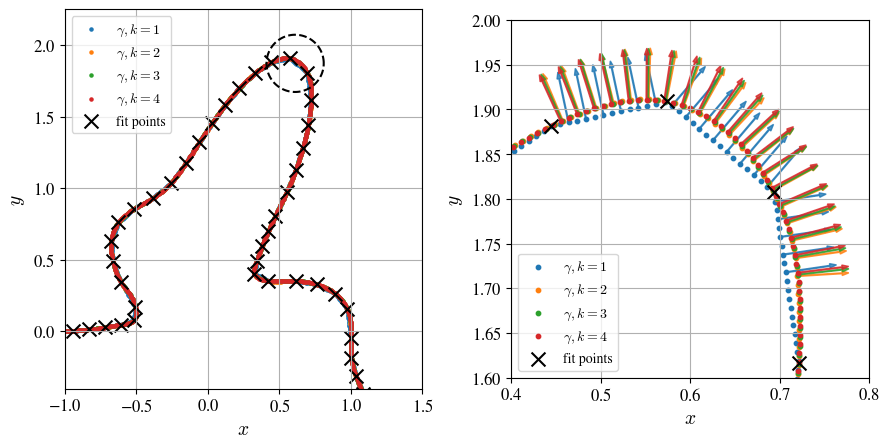

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(9, 5))

# ************
# Plot shape.
# ************
ax = axs[0]

data = h5.File(source_file, 'r')

groups = list(data.keys())

for group in groups:
    if not('domain_spline' in group):
        continue

    positions = data['{}/pos'.format(group)][:]

    ax.scatter(positions[0], positions[1], label='$\gamma, k = {}$'.format(group.split('_')[-1]), s=5)

fi = np.linspace(0, 2*np.pi, 100)
center = [0.610, 1.873]
r = 0.2
x = r * np.cos(fi) + center[0]
y = r * np.sin(fi) + center[1]
ax.plot(x, y, '--k')

positions = data['domain/pos'][:]
ax.scatter(positions[0], positions[1], marker='x', label='fit points', color='k',  s = 100)

ax.legend()
ax.grid("both")
ax.set_aspect('equal')
ax.set_xlim(left=-1, right=1.5)
ax.set_ylim(bottom=-0.4)
ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')

# **************
# Plot normals.
# **************
ax=axs[1]
data = h5.File(source_file, 'r')

groups = list(data.keys())

for group in groups:
    if not('domain_spline' in group):
        continue

    positions = data['{}/pos'.format(group)][:]
    normals = data['{}/normals'.format(group)][:]

    sc = ax.scatter(positions[0], positions[1], label='$\gamma, k = {}$'.format(group.split('_')[-1]), s=10)

    for i in range(0, len(positions[0]), 2):
        x = positions[0][i]
        y = positions[1][i]
        if not((x > 0.45) and (x < 1) and (y > 1.7)):
            continue; 
        
        dx = normals[0][i]
        dy = normals[1][i]
        norm=0.05
        arrow = ax.arrow(x, y, dx*norm, dy*norm,color=sc.get_facecolor(), alpha = 0.8, head_width=0.005, label='normal vector' if i == 0 else None)

positions = data['domain/pos'][:]
ax.scatter(positions[0], positions[1], marker='x', label='fit points', color='k', s = 100)

# fi = np.linspace(0, 2*np.pi, 100)
# center = [0.4759, 1.997]
# r = 0.04
# x = r * np.cos(fi) + center[0]
# y = r * np.sin(fi) + center[1]
# ax.plot(x, y, '--k')

# fi = np.linspace(0, 2*np.pi, 100)
# center = [0.7946, 1.8374]
# r = 0.03
# x = r * np.cos(fi) + center[0]
# y = r * np.sin(fi) + center[1]
# ax.plot(x, y, '--k')


ax.legend()
ax.grid("both")
ax.set_aspect('equal')
ax.set_xlim(left=0.4, right=0.8)
ax.set_ylim(bottom=1.6, top=2)
ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')


fig.tight_layout()

if 1:
    fig.savefig('../manuscript/paper/figures/reconstruction_flower.eps', dpi=300, transparent=False, bbox_inches='tight')

data.close()


# Combined plot.

In [6]:
source_file = '../data/flower_spline_order.h5'

/tmp/ipykernel_157456/2516914370.py:52: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[1]._sizes = [50]
/tmp/ipykernel_157456/2516914370.py:53: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[2]._sizes = [30]


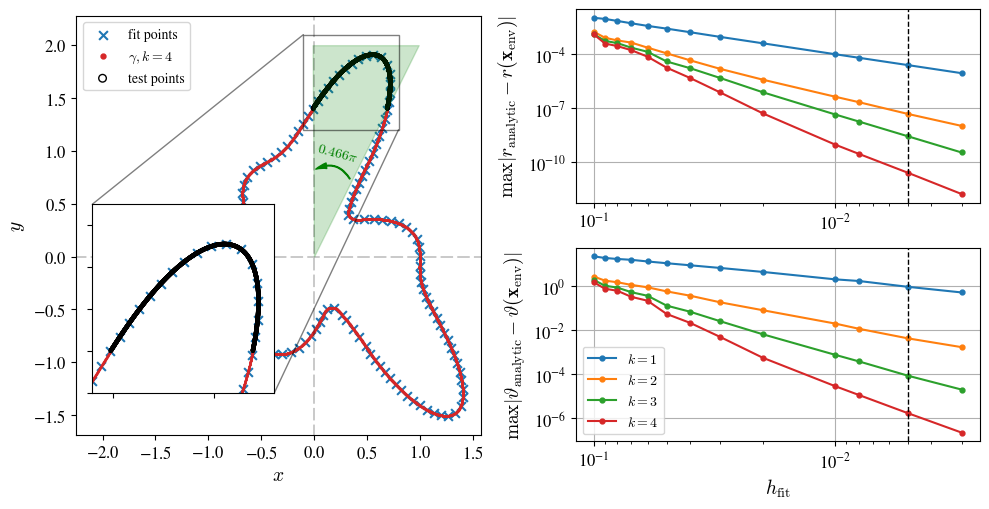

In [8]:
fig = plt.figure(tight_layout=True, figsize=(10, 5.2))
gs = gridspec.GridSpec(2, 2)

# *******************
# Left panel - domain
# *******************

ax = fig.add_subplot(gs[:, 0])

ax.axhline(y=0, color='k',lw=0.3, ls=(5,(30,10)))
ax.axvline(x=0, color='k',lw=0.3, ls=(5,(30,10)))

h = 0.08
largest=10
with h5.File(source_file, 'r') as data:
    positions_fit = data['domain_{}/pos'.format(h)]
    ax.scatter(*positions_fit,marker='x', s=40, label="fit points")

    for degree in [4]:
        positions = data['domain_spline_{}_{}/pos'.format(degree,h)][:]
        ax.scatter(*positions, s=0.5, marker='.', label="$\gamma, k=4$", c='tab:red')
        err = data['domain_spline_{}_{}/error_pos'.format(degree, h)][:][0]
        idx = positions[1]>1.4
        ax.scatter(positions[0][idx], positions[1][idx], facecolors='none', edgecolors='black',s=5, label="test points")

# inset axes to zoom
axins = ax.inset_axes([0.04, 0.1, 0.45, 0.45])
with h5.File(source_file, 'r') as data:
    positions_fit = data['domain_{}/pos'.format(h)]
    axins.scatter(*positions_fit,marker='x', s=40)

    for degree in [4]:
        positions = data['domain_spline_{}_{}/pos'.format(degree,h)][:]
        axins.scatter(*positions, s=0.5, marker='.', c='tab:red')
        err = data['domain_spline_{}_{}/error_pos'.format(degree, h)][:][0]
        idx = np.argpartition(err, -largest)[-largest:]
        idx = positions[1]>1.4
        axins.scatter(positions[0][idx], positions[1][idx], facecolors='none', edgecolors='black',s=5)
# # sub region of the original image
x1, x2, y1, y2 = -0.1, 0.8, 1.2, 2.1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])

ax.indicate_inset_zoom(axins, edgecolor="black")
ax.set_xlim(left=-2.25)
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
lgnd = ax.legend()
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [30]

# ************
# Fill between
# ************
x = positions[0][idx]
y = positions[1][idx]
angles = [np.arctan2(y[i],x[i]) for i in range(len(x))]
fi1 = np.max(angles)
fi2 = np.min(angles)
x1 = [r * np.cos(fi1) for r in np.linspace(2, 0, 100)]
y1 = [r * np.sin(fi1) for r in np.linspace(2, 0, 100)]
x2 = [r * np.cos(fi2) for r in np.linspace(0, 2 / np.sin(fi2), 100)]
y2 = [r * np.sin(fi2) for r in np.linspace(0, 2/ np.sin(fi2), 100)]

x = x1 + x2
y_b = y1+y2
y_t = [2]*len(x)

ax.fill_between(x, y_b, y_t, alpha = 0.2, color='green')
a3 = patches.FancyArrowPatch((0.3526, 0.7132), (-0.0061, 0.8151), connectionstyle="arc3,rad=.5", **kw)
plt.gca().add_patch(a3)

ax.text(0.02, 0.9, r'$0.466 \pi$', rotation=-15, c="green")

# **********************
# Right panel - analysis
# **********************

hs = [0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.008,0.005,0.003]
degrees=[1,2,3,4]
# Radius error.
ax = fig.add_subplot(gs[0, 1])
with h5.File(source_file, 'r') as data:
    errors = []
    for h in hs:
        e = []
        for degree in degrees:
            positions = data['domain_spline_{}_{}/pos'.format(degree, h)][:]
            err = np.abs(data['domain_spline_{}_{}/error_pos'.format(degree, h)][:][0])


            idx = positions[1] > 1.4
            err = err[idx]
            e.append(np.max(err))
        errors.append(e)

            

    ax.loglog(hs, errors, '.-', label=['$k = {}$'.format(i) for i in degrees], ms=7)



ax.grid("both")
ax.set_ylabel('$\max | r_\mathrm{analytic} - r(\mathbf{x}_\mathrm{env})|$')
ax.axvline(0.005,color='k', ls='--',lw=1)
ax.invert_xaxis()

# Normal angle error.
ax = fig.add_subplot(gs[1, 1])
with h5.File(source_file, 'r') as data:
    errors = []
    for h in hs:
        e = []
        for degree in degrees:
            positions = data['domain_spline_{}_{}/pos'.format(degree, h)][:]
            err = np.abs(data['domain_spline_{}_{}/error_angle'.format(degree, h)][:][0])


            idx = positions[1] > 1.4
            err = err[idx]
            e.append(np.max(err))
        errors.append(e)
            

    ax.loglog(hs, errors, '.-', label=['$k = {}$'.format(i) for i in degrees], ms=7)

ax.legend()
ax.grid("both")
ax.set_ylabel('$\max | \\vartheta_\mathrm{analytic} - \\vartheta(\mathbf{x}_\mathrm{env})|$')
ax.set_xlabel(r'$h_\mathrm{fit}$')
ax.invert_xaxis()

ax.axvline(0.005,color='k', ls='--',lw=1)
fig.tight_layout()

if 1:
    fig.savefig('../manuscript/paper/figures/reconstruction_flower_splines.jpg', dpi=300, transparent=False, bbox_inches='tight')

data.close()